In [9]:
import sys
sys.path.insert(0, "/home/ubuntu/aiclass/1731036003_HANJINKIM/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
from timeit import default_timer as timer
%matplotlib inline
# pip install pygraphviz

In [10]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [11]:
#n.draw_and_show(figsize=(20, 10))

In [12]:
#data = mnist.MNIST_Data()
data = mnist.MNIST_Data()

In [13]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
s = timer()
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)
e = timer()

print(e - s) * 1000

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1015
Epoch   0 Completed - Train Error: 2.319949 - Validation Error: 2.313531 - Test Accuracy: 0.101500
Epoch   1 Completed - Train Error: 0.424003 - Validation Error: 0.405478 - Test Accuracy: 0.879300
Epoch   2 Completed - Train Error: 0.287941 - Validation Error: 0.269438 - Test Accuracy: 0.919000
Epoch   3 Completed - Train Error: 0.230712 - Validation Error: 0.216039 - Test Accuracy: 0.933800
Epoch   4 Completed - Train Error: 0.168661 - Validation Error: 0.184542 - Test Accuracy: 0.942500
Epoch   5 Completed - Train Error: 0.148807 - Validation Error: 0.162662 - Test Accuracy: 0.949900
Epoch   6 Completed - Train Error: 0.157379 - Validation Error: 0.146448 - Test Accuracy: 0.954000
Epoch   7 Completed - Train Error: 0.109438 - Validation Error: 0.134082 - Test Accuracy: 0.957300
Epoch   8 Completed - Train Error: 0.110408 - Validation Error: 0.124217 - Test Accuracy: 0.960100
Epoch   9 Completed - Train Error: 0.120460 - Validation Error: 0.116300 - Test Accur

Epoch  83 Completed - Train Error: 0.002687 - Validation Error: 0.089711 - Test Accuracy: 0.977000
Epoch  84 Completed - Train Error: 0.006275 - Validation Error: 0.089981 - Test Accuracy: 0.976800
Epoch  85 Completed - Train Error: 0.003597 - Validation Error: 0.090241 - Test Accuracy: 0.976900
Epoch  86 Completed - Train Error: 0.003570 - Validation Error: 0.090544 - Test Accuracy: 0.976900
Epoch  87 Completed - Train Error: 0.003114 - Validation Error: 0.090604 - Test Accuracy: 0.976700
Epoch  88 Completed - Train Error: 0.002965 - Validation Error: 0.090884 - Test Accuracy: 0.976800
Epoch  89 Completed - Train Error: 0.004058 - Validation Error: 0.091244 - Test Accuracy: 0.976800
Epoch  90 Completed - Train Error: 0.002133 - Validation Error: 0.091265 - Test Accuracy: 0.976600
Epoch  91 Completed - Train Error: 0.003305 - Validation Error: 0.091447 - Test Accuracy: 0.976600
Epoch  92 Completed - Train Error: 0.002526 - Validation Error: 0.091723 - Test Accuracy: 0.976500
Epoch  93 

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

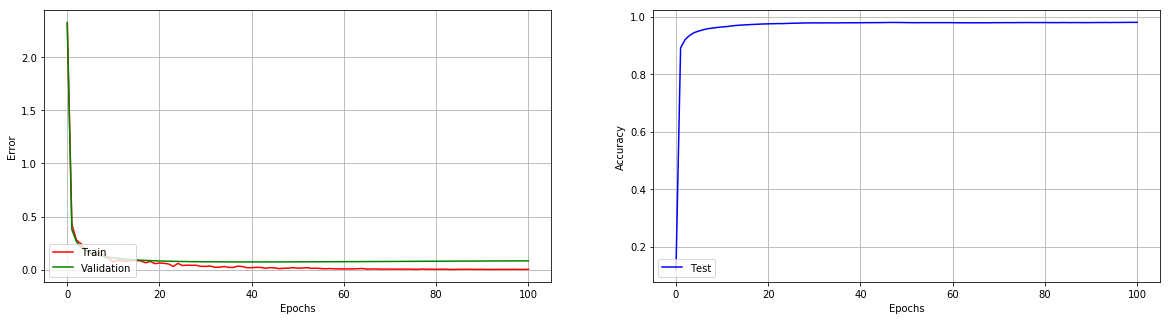

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 115, Prediction: Nine, Ground Truth: Four
False Prediction Index: 149, Prediction: Four, Ground Truth: Two
False Prediction Index: 247, Prediction: Two, Ground Truth: Four
False Prediction Index: 259, Prediction: Zero, Ground Truth: Six
False Prediction Index: 321, Prediction: Seven, Ground Truth: Two


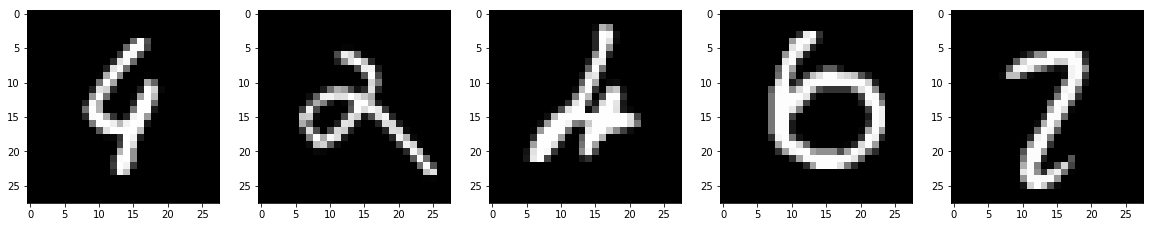

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

In [ ]:
n.draw_param_description(figsize=(20, 10))

In [ ]:
import numpy
numpy.version.version